In [ ]:
!pip install qiskit pylatexenc

In [78]:
import qiskit

In [79]:
from qiskit import *

In [80]:
secretnumber = '1011' # '1110010001'
indices = [0, 2, 3] # [1, 0, 2, 9, 5]
n = len(secretnumber)
circuit = QuantumCircuit(n+1, n)
circuit.x(n)
circuit.barrier()
circuit.h(range(n))
circuit.h(n)
circuit.barrier()
for index in indices:
  circuit.cx(n-index-1, n)
circuit.barrier()
circuit.h(range(n))
# circuit.h(n)
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=5, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(5, 'q'), 0), Qubit(QuantumRegister(5, 'q'), 1), Qubit(QuantumRegister(5, 'q'), 2), Qubit(QuantumRegister(5, 'q'), 3), Qubit(QuantumRegister(5, 'q'), 4)), clbits=())

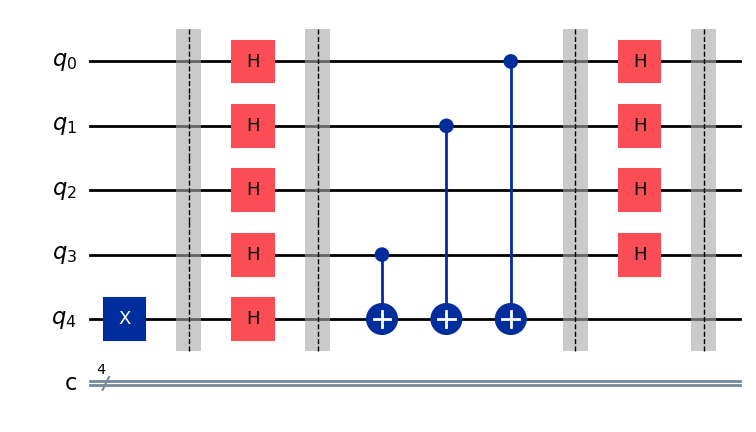

In [81]:
circuit.draw(output='mpl')

In [82]:
from qiskit.quantum_info import Statevector
sv = Statevector.from_instruction(circuit)
sv.draw('latex')

<IPython.core.display.Latex object>

In [ ]:
!pip install qiskit-aer

In [84]:
circuit.measure(range(n), range(n))

from qiskit_aer import AerSimulator
aersim = AerSimulator()
circuit = transpile(circuit, aersim)

In [85]:
result = aersim.run(circuit, shots = 1).result()
counts = result.get_counts(circuit)

In [86]:
print(result.get_counts(circuit))

{'1011': 1}


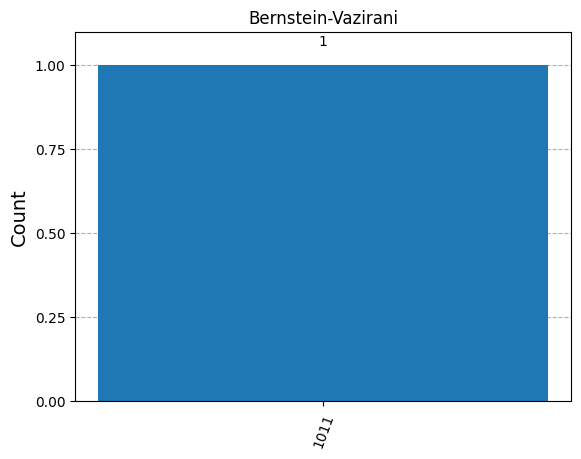

In [87]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

plot_histogram(counts, title='Bernstein-Vazirani')
# plot_histogram(counts, title='Bell-State counts')